<a href="https://www.bigdatauniversity.com"><img src = "Cognitive-Class-Logo.png" width = 400, align = "center"></a>
# <center>Analyse de la régression non linéaire</center>

Si les données montrent une tendance courbe, la régression linéaire ne produira pas de résultats très précis par rapport à une régression non linéaire car, comme son nom l'indique, la régression linéaire suppose que les données sont linéaires. Apprenons les régressions non linéaires et appliquons un exemple sur python. Dans ce cahier, nous avons ajusté un modèle non linéaire aux points de données correspondant au PIB de la Chine de 1960 à 2014.

### Importing required libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Bien que la régression linéaire soit très bonne pour résoudre de nombreux problèmes, elle ne peut pas être utilisée pour tous les ensembles de données. Rappelez-vous d'abord comment la régression linéaire peut modéliser un ensemble de données. Il modélise une relation linéaire entre une variable dépendante y et une variable indépendante x. Il avait une équation simple, de degré 1, par exemple y = 2 * (x) + 3.

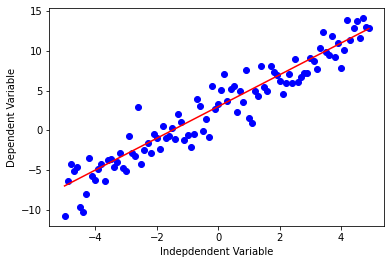

In [5]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2*np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Les régressions non linéaires sont une relation entre des variables indépendantes $ x $ et une variable dépendante $ y $ qui aboutissent à des données modélisées par fonction non linéaire. Essentiellement, toute relation qui n'est pas linéaire peut être qualifiée de non linéaire et est généralement représentée par le polynôme de $ k $ degrés (puissance maximale de $ x $).

$$ \ y = a x ^ 3 + b x ^ 2 + c x + d \ $$

Les fonctions non linéaires peuvent avoir des éléments tels que des exponentielles, des logarithmes, des fractions et autres. Par exemple: $$ y = \ log (x) $$
    
Ou même, plus compliqué comme:
$$ y = \ log (a x ^ 3 + b x ^ 2 + c x + d) $$

Jetons un œil au graphique d'une fonction cubique.

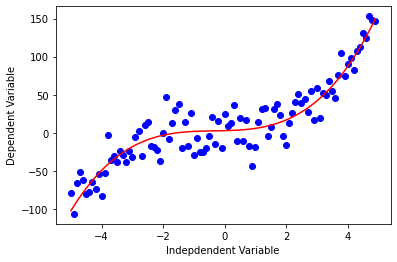

In [6]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Comme vous pouvez le voir, cette fonction a $ x ^ 3 $ et $ x ^ 2 $ comme variables indépendantes. De plus, le graphique de cette fonction n'est pas une ligne droite sur le plan 2D. C'est donc une fonction non linéaire.

Certains autres types de fonctions non linéaires sont:

### Quadratique

$$ Y = X^2 $$

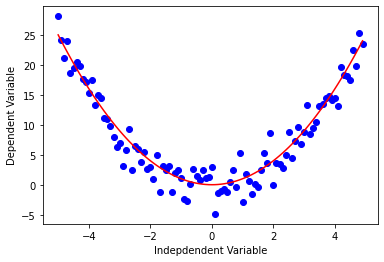

In [7]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Exponentielle

Une fonction exponentielle de base c est définie par $$ Y = a + b c ^ X $$ où b ≠ 0, c> 0, c ≠ 1 et x est un nombre réel quelconque. La base, c, est constante et l'exposant, x, est une variable.

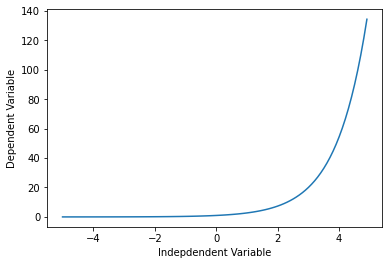

In [8]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logarithmique

La réponse $ y $ est un résultat de l'application de la carte logarithmique de l'entrée $ x $ à la variable de sortie $ y $. C'est l'une des formes les plus simples de __log__(): c'est-à-dire $$ y = \log (x) $$

Veuillez considérer qu'au lieu de $ x $, nous pouvons utiliser $ X $, qui peut être une représentation polynomiale des $ x $. Dans sa forme générale, il serait écrit
$$y = \ log (X)$$


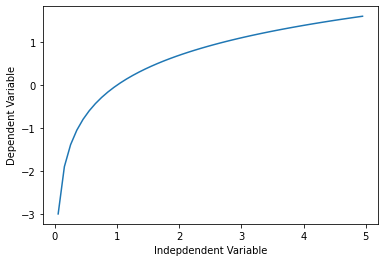

In [9]:
X = np.arange(0.05, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Sigmoidal/Logistic

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

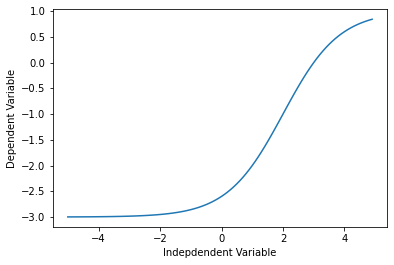

In [10]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

<a id="ref2"> </a>
# Exemple de régression non linéaire

Par exemple, nous allons essayer d'ajuster un modèle non linéaire aux points de données correspondant au PIB de la Chine de 1960 à 2014. Nous téléchargeons un jeu de données avec deux colonnes, la première, une année entre 1960 et 2014, la seconde, Revenu intérieur brut annuel correspondant de la Chine en dollars américains pour cette année.

In [11]:
import numpy as np
import pandas as pd

#downloading dataset
#!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Tracer l'ensemble de données ###
Voici à quoi ressemblent les points de données. Cela ressemble à une fonction logistique ou exponentielle. La croissance démarre lentement, puis à partir de 2005, la croissance est très significative. Et finalement, il ralentit légèrement dans les années 2010.

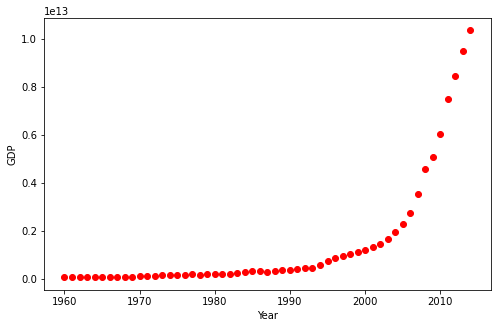

In [12]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Choisir un modèle ###

À partir d'un premier regard, nous déterminons que la fonction logistique pourrait être une bonne approximation,
car il a la propriété de commencer par une croissance lente, en augmentant la croissance au milieu, puis en diminuant à nouveau à la fin; comme illustré ci-dessous:

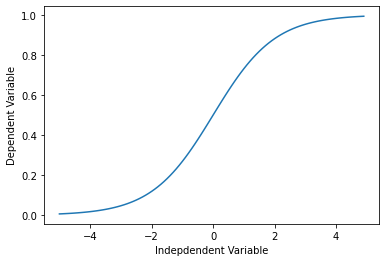

In [13]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()



La formule de la fonction logistique est la suivante:

$$ \hat {Y} = \frac1 {1 + e ^ {\beta_1 (X- \beta_2)}} $$

$ \beta_1 $: contrôle la pente de la courbe,

$ \beta_2 $: fait glisser la courbe sur l'axe des x.

construisons notre modèle de régression et initialisons ses paramètres.

In [14]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Regardons un exemple de ligne sigmoïde qui pourrait correspondre aux données:

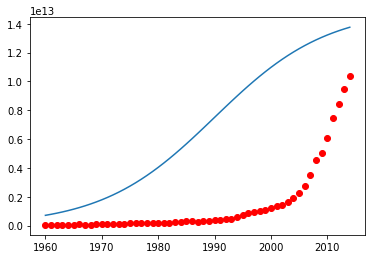

In [16]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Notre tâche ici est de trouver les meilleurs paramètres pour notre modèle. Commençons par normaliser nos x et y:

In [17]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### Comment trouver les meilleurs paramètres pour notre ligne d'ajustement?
Nous pouvons utiliser __curve_fit__ qui utilise les moindres carrés non linéaires pour adapter notre fonction sigmoïde aux données. Valeurs optimales des paramètres afin que la somme des carrés des résidus de sigmoïde (xdata, * popt) - ydata soit minimisée.

popt sont nos paramètres optimisés.

In [19]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451710, beta_2 = 0.997207


Maintenant, nous traçons notre modèle de régression résultant.

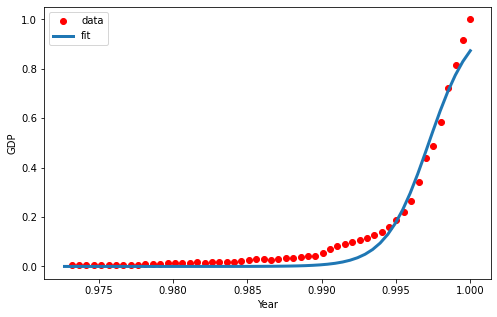

In [20]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Practice
Can you calculate what is the accuracy of our model?

In [22]:
# write your code here
    
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: -1.77


Double-click __here__ for the solution.

<!-- Your answer is below:
    
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

-->



### Merci d'avoir suivi cette leçon!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​